<a href="https://colab.research.google.com/github/reolingovender/MIT805/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00


In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [30]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.1 MB/s eta 0:00:00


In [41]:
import datasets
from datasets import load_dataset
import numpy as np
import pandas as pd
import emoji

In [13]:
datasets.logging.set_verbosity_error()
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [14]:
df = pd.DataFrame(dataset['full'])

In [ ]:
def demoji(text):
  return emoji.demojize(text)

In [43]:
df['text'] = df['text'].apply(demoji)

,text
0,This spray is really nice. It smells really go...
1,"This product does what I need it to do, I just..."
2,"Smells good, feels great!"
3,Felt synthetic
4,Love it
...,...
701523,Conditioner is great shampoo not as I expected
701524,Did not work! Used the whole bottle and my hai...
701525,Product as expected. Shipping was on time.
701526,"Not only is it a delicious fragrance, but also..."


In [15]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [63]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
from gensim.parsing.preprocessing import remove_stopwords

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    sentence = remove_stopwords(sentence)
    return sentence

df["text"][0: 5].apply(cleanup)

,text
0,spray nice smells good goes fine trick feels l...
1,product need wish odorless soft coconut smell ...
2,smells good feels great
3,felt synthetic
4,love


In [ ]:
# remove empty reviews and rating
df = df[(df['reviews.text'].isnull()==False)&(df['reviews.rating'].isnull()==False)]

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define sentiment analysis function using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

In [17]:
n = 200

In [61]:
df['text'][0:n].apply(get_sentiment)

,text
0,0.8162
1,0.7783
2,0.8070
3,0.0000
4,0.6369
...,...
195,0.3102
196,0.9123
197,0.7140
198,0.6082


In [64]:
df['text'][0:n].apply(cleanup).apply(get_sentiment)

,text
0,0.7430
1,0.8402
2,0.7906
3,0.0000
4,0.6369
...,...
195,0.1226
196,0.9670
197,0.6124
198,0.9382


In [19]:
|df[['text', 'rating']][0:n]

,text,rating
0,This spray is really nice. It smells really go...,5.0
1,"This product does what I need it to do, I just...",4.0
2,"Smells good, feels great!",5.0
3,Felt synthetic,1.0
4,Love it,5.0
...,...,...
195,The flip top cap has a tab on it that has to b...,4.0
196,I love the tines on this long and short detang...,3.0
197,This comes in a one gallon jug. There are two ...,3.0
198,I used this on my three long-haired cats and i...,2.0


In [50]:
from transformers import pipeline
roberta_classifier = pipeline("sentiment-analysis" , model= "nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [51]:
def reboerta(text):
    score = roberta_classifier(text)[0].get('score')
    return score

In [52]:
df['text'][0:n].apply(reboerta)

KeyboardInterrupt: 

In [ ]:
# x = df['rating'][0:n].to_list()
# y = df['text'][0:n].apply(reboerta).to_list()

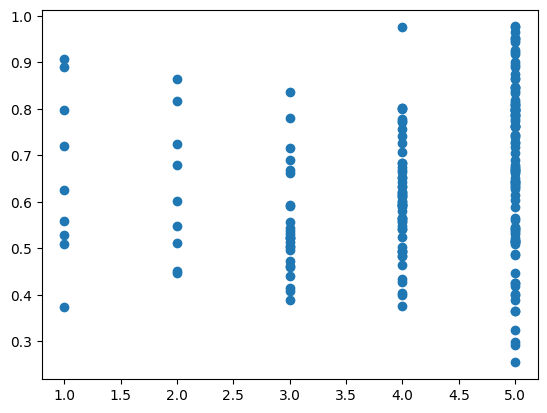

In [ ]:
# from matplotlib import pyplot as plt

# plt.plot(x, y, 'o')

In [ ]:
# y1 = df['text'][0:n].apply(get_sentiment).to_list()

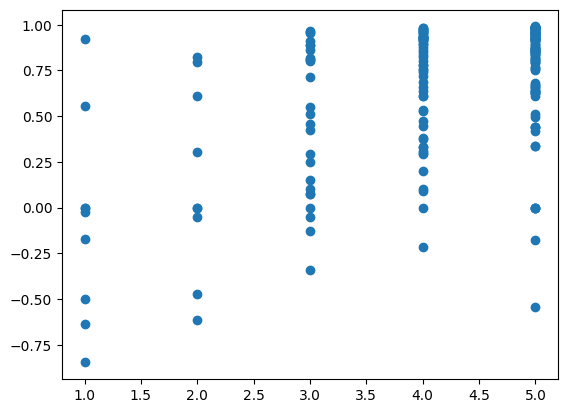

In [ ]:
# from matplotlib import pyplot as plt

# plt.plot(x, y1, 'o')

In [ ]:
# from google.colab import drive

In [ ]:
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset['full'].to_csv('drive/MyDrive/testing.csv')

Creating CSV from Arrow format:   0%|          | 0/702 [00:00<?, ?ba/s]

226752321

In [56]:

df["text"][0: 5].apply(reboerta)

,text
0,0.560469
1,0.565003
2,0.640327
3,0.374113
4,0.834829


In [58]:
df["text"][0: 5].apply(cleanup).apply(reboerta)

,text
0,0.613287
1,0.521306
2,0.511632
3,0.374113
4,0.834829


In [65]:
from transformers import pipeline
third_classifier = pipeline("sentiment-analysis" , model= "lxyuan/distilbert-base-multilingual-cased-sentiments-student")

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [66]:
def third(text):
    score = third_classifier(text)[0].get('score')
    return score

In [72]:
df["text"][0: 100].apply(third)

,text
0,0.939404
1,0.603008
2,0.993287
3,0.819817
4,0.960044
...,...
95,0.416011
96,0.476361
97,0.662744
98,0.435354


In [71]:
df[['text', 'rating']]

,text,rating
0,This spray is really nice. It smells really go...,5.0
1,"This product does what I need it to do, I just...",4.0
2,"Smells good, feels great!",5.0
3,Felt synthetic,1.0
4,Love it,5.0
...,...,...
701523,Conditioner is great shampoo not as I expected,4.0
701524,Did not work! Used the whole bottle and my hai...,1.0
701525,Product as expected. Shipping was on time.,5.0
701526,"Not only is it a delicious fragrance, but also...",5.0
